## Predicting Profit for the next week

In [2]:
## importing required packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [3]:
## reading data 

data = pd.read_excel('Pizza_Sale.xlsx')

data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
data = data[['order_date', 'quantity', 'total_price']]

In [5]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True)

In [6]:
data

,order_date,quantity,total_price
0,2015-01-01,1,13.25
1,2015-01-01,1,16.00
2,2015-01-01,1,18.50
3,2015-01-01,1,20.75
4,2015-01-01,1,16.00
...,...,...,...
48615,2015-12-31,1,16.75
48616,2015-12-31,1,17.95
48617,2015-12-31,1,12.00
48618,2015-12-31,1,20.25


In [7]:
data = data.groupby(['order_date']).agg({'quantity': 'sum', 'total_price':'sum'}).reset_index()

In [8]:
data.set_index('order_date', inplace=True)

In [9]:
data

,quantity,total_price
order_date,,
2015-01-01,162,2713.85
2015-01-02,191,3189.20
2015-01-03,99,1598.55
2015-01-04,135,2176.85
2015-01-05,154,2571.95
...,...,...
2015-12-27,89,1419.00
2015-12-28,102,1637.20
2015-12-29,80,1353.25


## Vizualize 

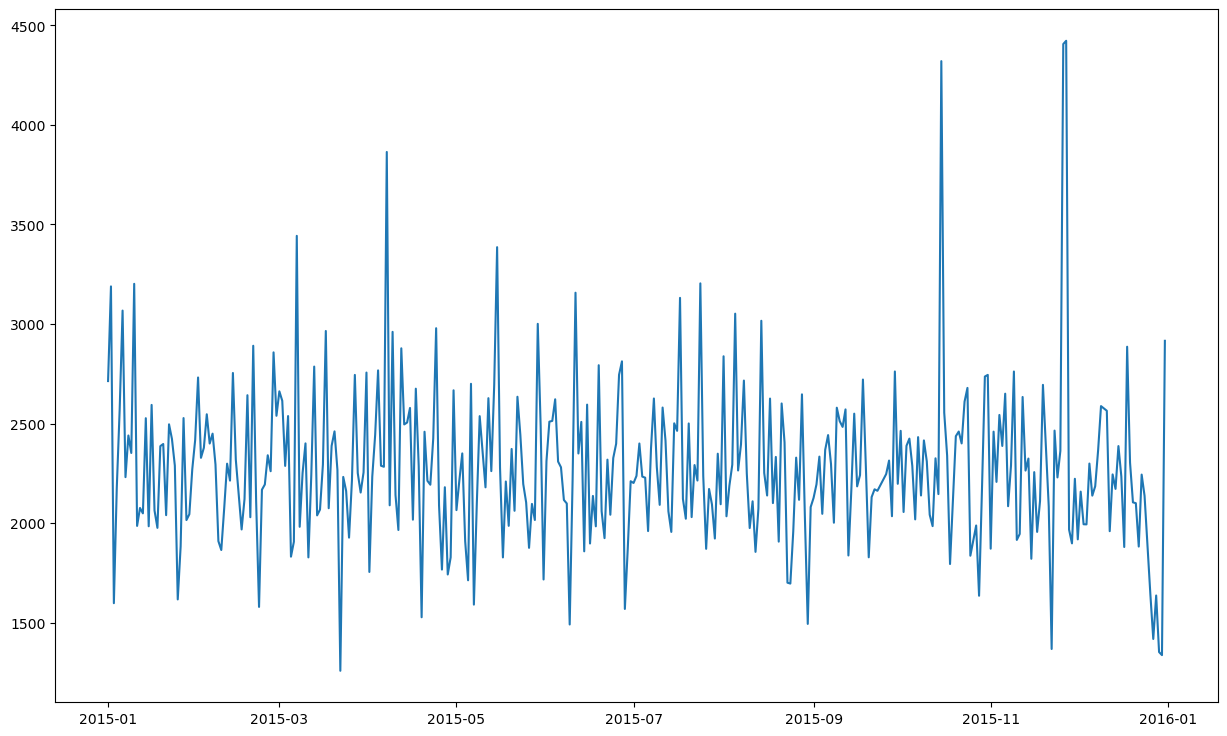

In [11]:
plt.figure(figsize=(15, 9))

plt.plot(data['total_price'])
plt.show()

In [12]:
## DATA SEPARATION 

price_data = data[['total_price']]



In [13]:
# rolling window test 

def stationary_test(data, window, col_name, title):
    data['r_mean'] = data[col_name].rolling(window=window).mean()
    data['r_std'] = data[col_name].rolling(window = window).std()

    # plotting 
    sns.lineplot(x=data.index, y=data[col_name], label='original', color='blue')
    sns.lineplot(x=data.index, y=data['r_mean'], label='rolling mean', color= 'black')
    sns.lineplot(x=data.index, y=data['r_std'], label='rolling std ', color='red')
    # adfuller test
    result = adfuller(data[col_name])
    result_out = pd.Series(result[:4], index=['test statistics', 'p-value', 'lag used for test-statistics', 'no of observations used'])

    for key, value in result_out.items():
        print(key, " ", value)

test statistics   -9.533801908608652
p-value   2.844073477894358e-16
lag used for test-statistics   4.0
no of observations used   353.0


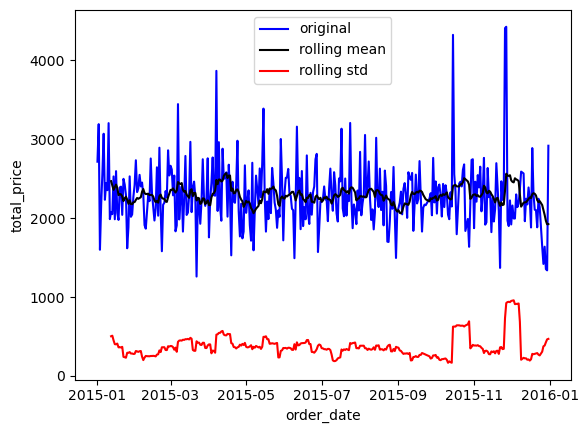

In [14]:
stationary_test(data[['total_price']], 12, 'total_price', 'total_price')

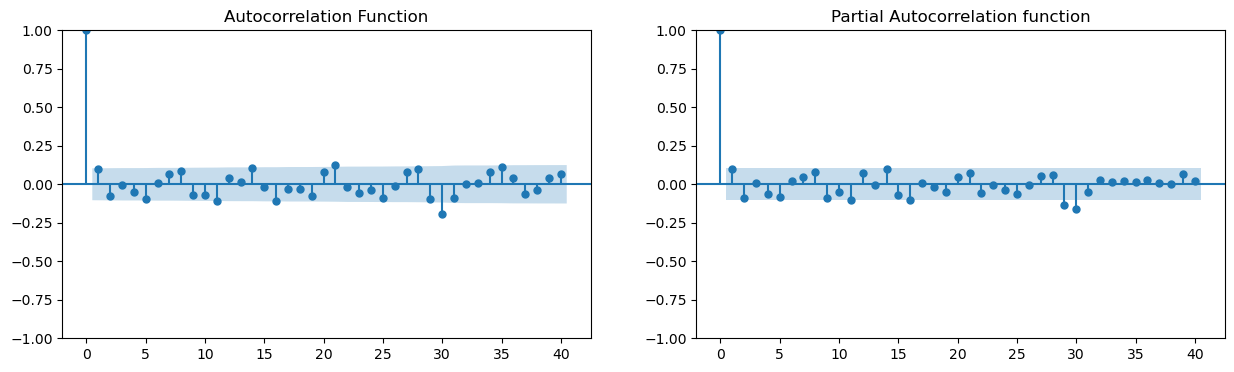

In [15]:
# pca and pacf plots 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plot_acf(data['total_price'], lags=40, ax=plt.gca(), title='Autocorrelation Function')

plt.subplot(1,2,2)
plot_pacf(data['total_price'], lags=40, ax=plt.gca(), title='Partial Autocorrelation function')
plt.show()

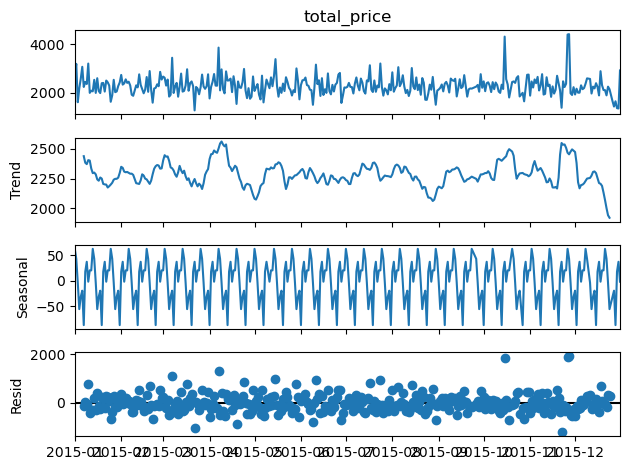

In [16]:
# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['total_price'], model='additive', period=12)
result.plot()
plt.show()

# Model Building 
## ARIMA Model

In [32]:
## model building 

model_price = ARIMA(price_data, order=(5,2,1))

model_price_fit = model_price.fit()

model_price_fit.summary()

C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            total_price   No. Observations:                  358
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -2674.844
Date:                Fri, 25 Apr 2025   AIC                           5363.688
Time:                        19:20:28   BIC                           5390.812
Sample:                             0   HQIC                          5374.477
                                - 358                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6974      0.041    -17.022      0.000      -0.778      -0.617
ar.L2         -0.6301      0.051    -12.463      0.000      -0.729      -0.531
ar.L3         -0.4411      0.052     -8.472      0.000      -0.543      -0.339
ar.L4         -0.3155      0.052     -6.059      0.000      -0.418      -0.213
ar.L5         -0.2323      0.051     -4.575      0.000      -0.332      -0.133
ma.L1         -1.0000      0.049    -20.570      0.000      -1.095      -0.905
sigma2      1.908e+05   2.55e-07   7.49e+11      0.000    1.91e+05    1.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               230.46
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.90
Prob(H) (two-sided):                  0.32   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+27. Standard errors may be unstable.
"""

In [93]:
## CHECKING THE PREDICTION USING CHARTS

future_steps = 15

model_price_prediction = model_price_fit.forecast(steps=future_steps)

model_datetime = pd.date_range(start='2015-01-01', periods=future_steps+1, freq='D')[1:]

pred_df = pd.DataFrame({
    'order_date': model_datetime,
    'total_price': model_price_prediction
})

pred_df

C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,order_date,total_price
358,2015-01-02,1928.576483
359,2015-01-03,1663.507296
360,2015-01-04,1840.285932
361,2015-01-05,1820.335560
362,2015-01-06,1779.698987
363,2015-01-07,2050.701847
364,2015-01-08,1896.961086
365,2015-01-09,1811.612678
366,2015-01-10,1860.969140
367,2015-01-11,1867.135396


In [95]:
pred_df.set_index('order_date',inplace=True)

In [97]:
train_data = price_data[price_data.index <= '2015-02-07']


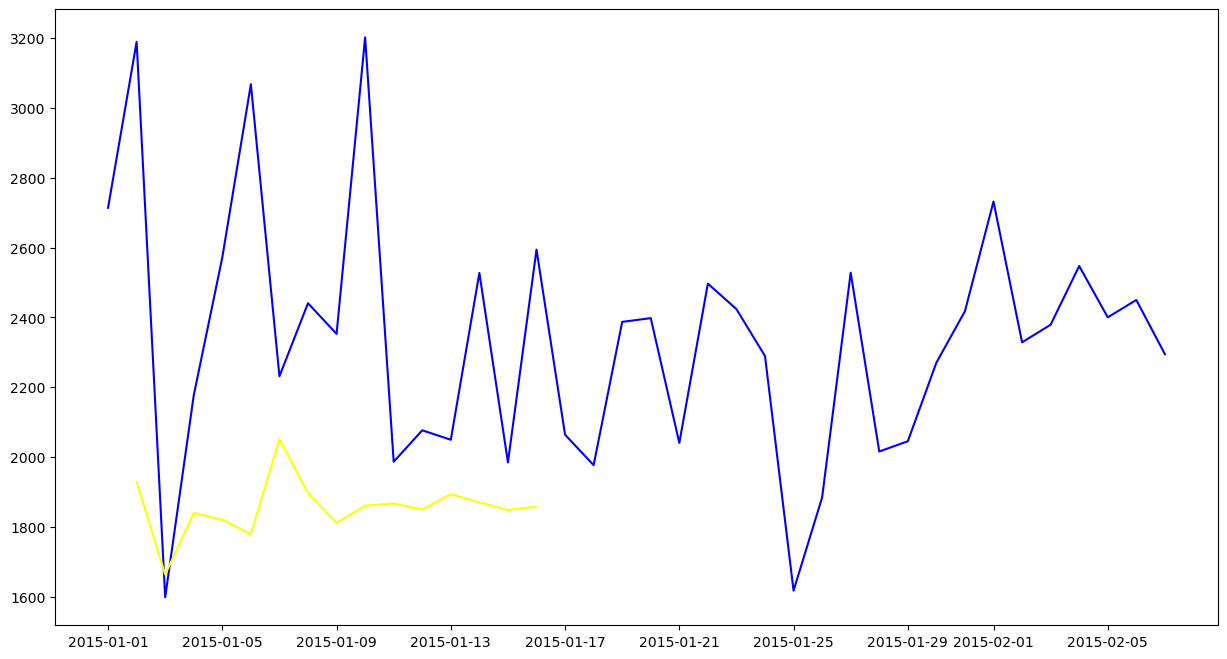

In [81]:
plt.figure(figsize=(15, 8))
plt.plot(train_data, color='blue')
plt.plot(pred_df, color='yellow')
plt.show()

## SARIMAX MODEL

In [84]:
price_data

,total_price
order_date,
2015-01-01,2713.85
2015-01-02,3189.20
2015-01-03,1598.55
2015-01-04,2176.85
2015-01-05,2571.95
...,...
2015-12-27,1419.00
2015-12-28,1637.20
2015-12-29,1353.25


In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(price_data, order=(5,2,1), seasonal_order=(1, 1, 1, 7))

sarimax_fit = sarimax_model.fit()

print(sarimax_fit.summary())

C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                       total_price   No. Observations:                  358
Model:             SARIMAX(5, 2, 1)x(1, 1, 1, 7)   Log Likelihood               -2629.084
Date:                           Fri, 25 Apr 2025   AIC                           5276.167
Time:                                   19:23:42   BIC                           5310.863
Sample:                                        0   HQIC                          5289.979
                                           - 358                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7263      0.042    -17.488      0.000      -0.808      -0.645
ar.L2         -0.6187      0.048    -12.790

In [101]:
## CHECKING THE PREDICTION USING CHARTS

future_steps = 7

model_price_prediction_s = sarimax_fit.forecast(steps=future_steps)

model_datetime = pd.date_range(start='2015-01-01', periods=future_steps+1, freq='D')[1:]

pred_df_s = pd.DataFrame({
    'order_date': model_datetime,
    'total_price': model_price_prediction_s
})

pred_df_s.set_index('order_date', inplace=True)
pred_df_s

C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,total_price
order_date,
2015-01-02,1782.117022
2015-01-03,1919.214203
2015-01-04,1969.397699
2015-01-05,1829.764971
2015-01-06,1604.079289
2015-01-07,1961.989936
2015-01-08,1873.928484


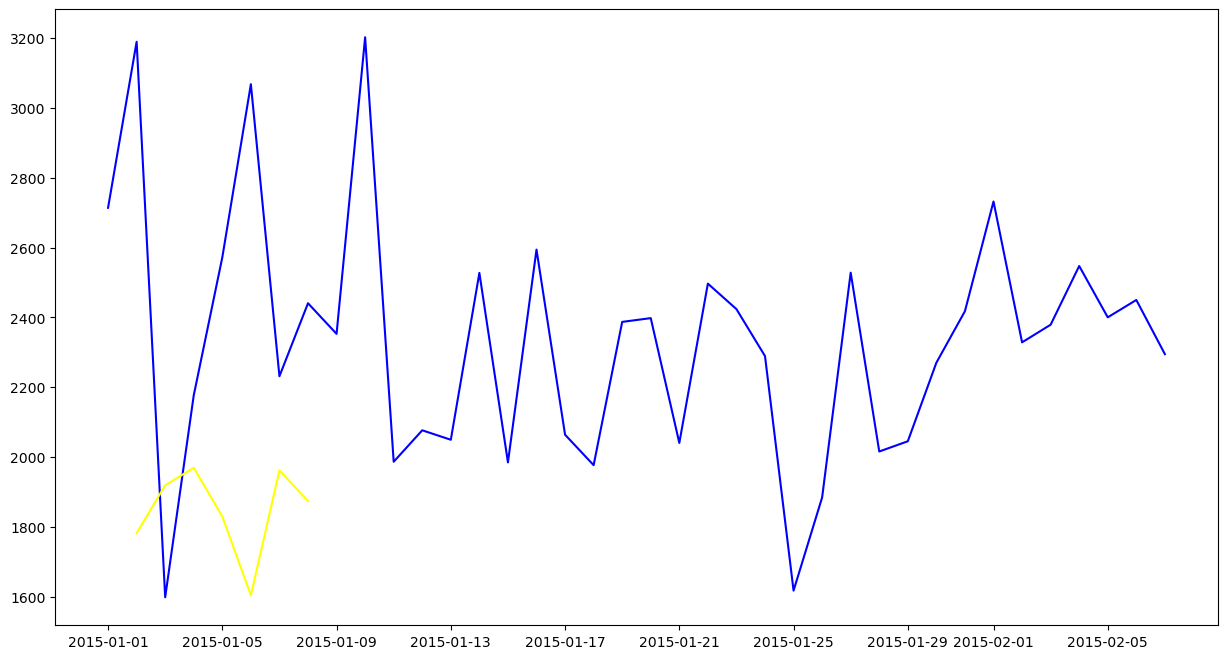

In [103]:
plt.figure(figsize=(15, 8))
plt.plot(train_data, color='blue')
plt.plot(pred_df_s, color='yellow')
plt.show()

## LSTM Model

In [ ]:
# importing packages 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Step 2: Scale the data
scaler = MinMaxScaler()
price_data_scl = scaler.fit_transform(price_data)

# Step 3: Create sequence
def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Step 4: Use scaled data
seq_length = 12
X, y = create_sequence(price_data_scl, seq_length)

print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
# re-shapeing 

X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# model 

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length,1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, y, epochs=20, verbose=1)

In [ ]:
def predict_price(dataframe, start_date, days_ahead):
    your_date = pd.to_datetime(start_date)
    
    # Get last 12 records before the start date
    previous_data = price_data[price_data.index < your_date].tail(seq_length)
    
    assert len(previous_data) == seq_length, "Not enough data before selected date!"
    
    # Scale the data using the PRE-FITTED scaler (don't fit again!)
    scaled_input = scaler.transform(previous_data[['total_price']])
    sequence = scaled_input.flatten()
    
    future_dates = [your_date + pd.Timedelta(days=i) for i in range(days_ahead)]
    predictions = []

    for i in range(days_ahead):
        X_input = sequence[-seq_length:].reshape(1, seq_length, 1)
        pred_scaled = lstm_model.predict(X_input, verbose=0)
        predictions.append(pred_scaled[0][0])
        sequence = np.append(sequence, pred_scaled[0][0])  # append for next prediction

    # Inverse transform to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    result_df = pd.DataFrame({
        'date': future_dates,
        'predicted_total_price': predictions
    })

    return pd.concat([dataframe, result_df], ignore_index=True)


In [ ]:
forecast_df = pd.DataFrame()
forecast_df = predict_price(forecast_df, "2016-1-01", 7)


print(forecast_df['predicted_total_price'].sum())


In [115]:
train_data[train_data.index< pd.to_datetime('2015-01-08')]['total_price']


order_date
2015-01-01    2713.85
2015-01-02    3189.20
2015-01-03    1598.55
2015-01-04    2176.85
2015-01-05    2571.95
2015-01-06    3067.75
2015-01-07    2231.50
Name: total_price, dtype: float64

## Saving the Model 

In [119]:
import pickle 


with open('price_model.pkl', 'wb') as file:
    pickle.dump(model_price_fit, file)

print('model saved..')

model saved..
